In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Phân tích mức tiêu hao nhiên liệu

## 1. ĐỌC DỮ LIỆU

Dữ liệu `mpg.csv` gồm các thông tin như sau:

- **mpg**: Miles/(US) gallon số gallon xăng trên 1 dặm
- **cylinders:** số lượng xilanh
- **displacement:**  Displacement/ dung tích xilanh (cu.in / $inches^3$)
- **horsepower:** công suất theo mã lực
- **weight:** trọng lượng (pound)
- **acceleration:** Gia tốc
- **model_year:** Năm sản xuất
- **origin:** Xuất xứ
- **name:** Tên dòng xe


In [3]:
mpg = pd.read_csv("mpg.csv")

## 2. TÌM HIỂU DỮ LIỆU

### 2.1 Kiểm tra có dòng nào không có dữ liệu?

In [4]:
mpg.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


### 2.2 Xóa các dòng không có dữ liệu


In [19]:
mpg = mpg.dropna(how="any", axis=0)

### 2.3 Tìm trung binh, trung vị của các thuộc tính: 'cylinders', 'horsepower', 'weight'

In [25]:
mpg[["cylinders", "horsepower", "weight"]].describe().loc[["mean", "50%"]]

,cylinders,horsepower,weight
mean,5.471939,104.469388,2977.584184
50%,4.000000,93.500000,2803.500000


### 2.4 Tìm miền giá trị và miền phân vị của thuộc tính 'mpg'

In [9]:
mpg["mpg"].max() - mpg["mpg"].min()

37.6

In [28]:
mpg["mpg"].quantile(0.75) - mpg["mpg"].quantile(0.25)

12.0

## 3. SO SÁNH MỨC TIÊU HAO NHIÊN LIỆU TRUNG BÌNH CỦA CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

So sánh mức tiêu hao nhiên liệu trung bình của các dòng xe Mỹ, Nhật và Châu Âu

In [11]:
mpg.groupby("origin")["mpg"].mean()

origin
europe    27.602941
japan     30.450633
usa       20.033469
Name: mpg, dtype: float64

## 4. VẼ HISTOGRAM TRỌNG LƯỢNG CÁC XE

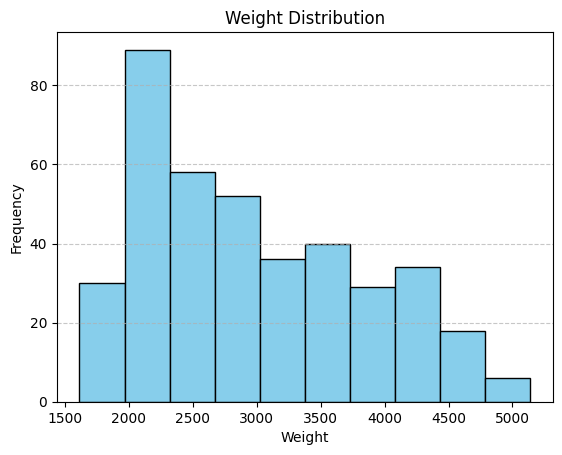

In [30]:
plt.hist(mpg["weight"], bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Weight Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


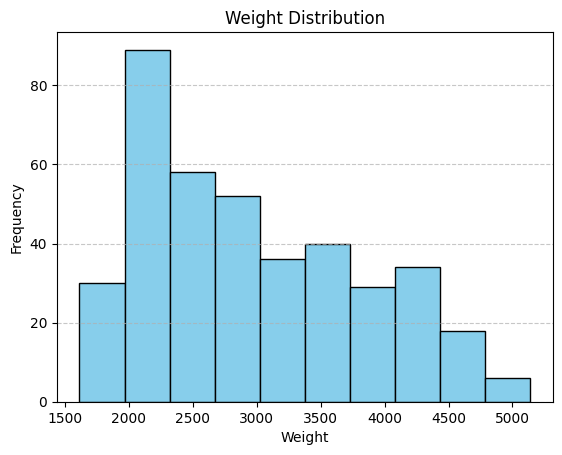

In [31]:
plt.hist(mpg["weight"], bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Weight Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## 5. TÍNH TỶ LỆ CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

In [32]:
mpg["origin"].value_counts(normalize=True)

origin
usa       0.625000
japan     0.201531
europe    0.173469
Name: proportion, dtype: float64

## 6. VẼ BOXPLOT SO SÁNH CÔNG SUẤT CỦA CÁC DÒNG XE THẬP NIÊN 70, 80

Lưu ý: Các dòng xe thập niên 70 (1970 - 1979), thập niên 80 (1980 - 1989)

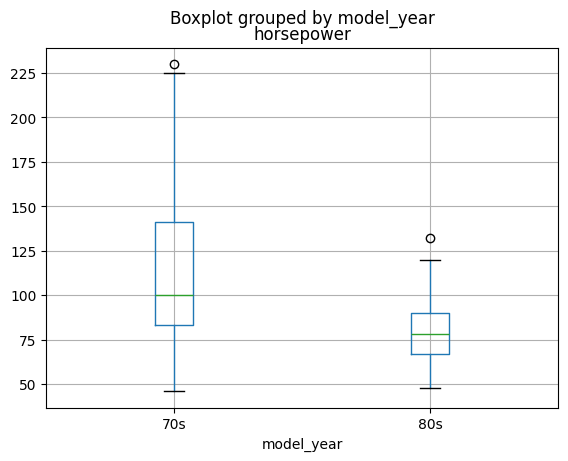

In [14]:
mpg_cp = mpg.copy()
mpg_cp["model_year"] = mpg_cp["model_year"].apply(lambda x: "70s" if x < 80 else "80s")
mpg_cp.boxplot(column="horsepower", by="model_year")
plt.show()

## 7. KHẢO SÁT MỨC TIÊU HAO NHIÊN LIỆU

### 7.1 Với số lượng xi lanh

Thử vẽ bằng đồ thị scatter plot.

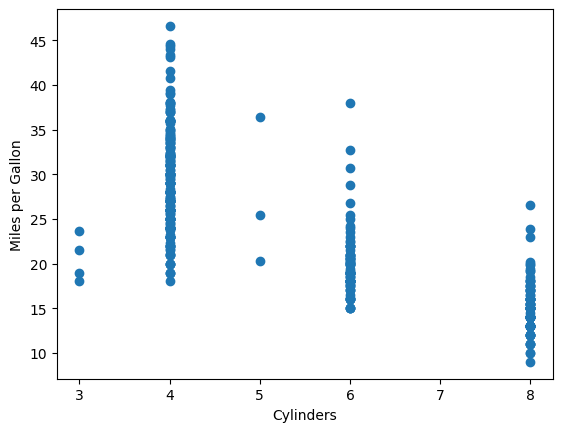

In [37]:
plt.scatter(x=mpg["cylinders"], y=mpg["mpg"])
plt.xlabel("Cylinders")
plt.ylabel("Miles per Gallon")
plt.show()

### 7.2 Với công suất theo mã lực

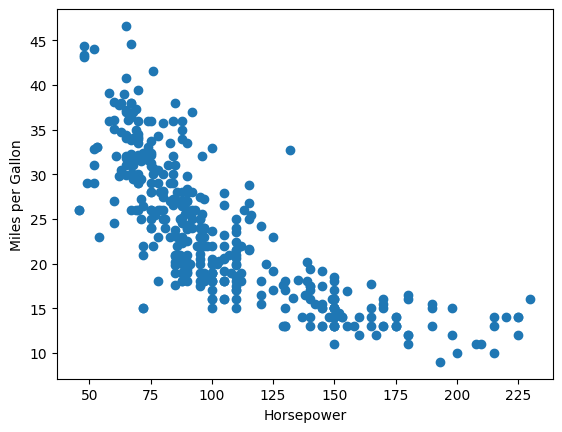

In [16]:
plt.scatter(mpg["horsepower"], mpg["mpg"])
plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon")
plt.show()

### 7.3 Với gia tốc

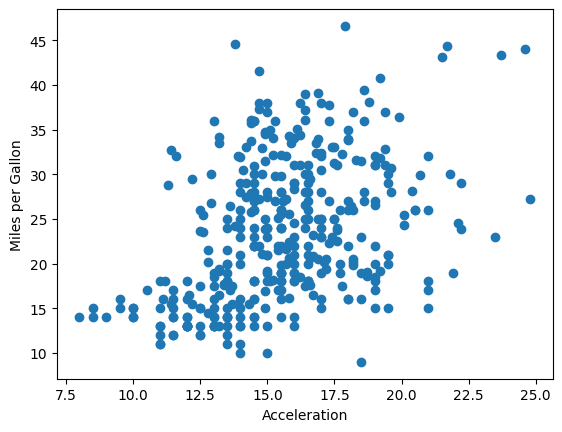

In [17]:
plt.scatter(mpg["acceleration"], mpg["mpg"])
plt.xlabel("Acceleration")
plt.ylabel("Miles per Gallon")
plt.show()

### 7.4 Với năm sản xuất

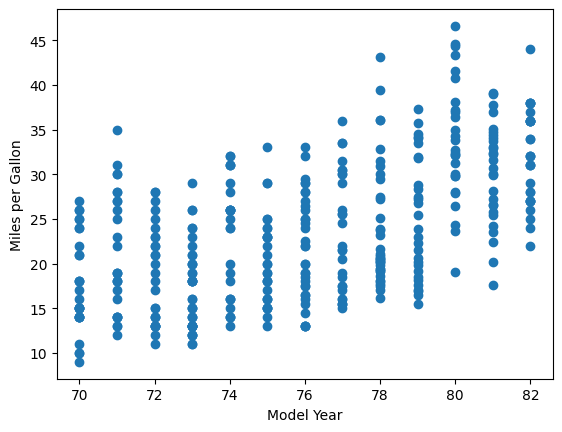

In [18]:
plt.scatter(mpg["model_year"], mpg["mpg"])
plt.xlabel("Model Year")
plt.ylabel("Miles per Gallon")
plt.show()